In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-busiest-airports-by-passenger-traffic/List of busiest airports by passenger traffic 2018.csv
/kaggle/input/list-of-busiest-airports-by-passenger-traffic/List of busiest airports by passenger traffic 2021.csv
/kaggle/input/list-of-busiest-airports-by-passenger-traffic/List of busiest airports by passenger traffic 2020.csv
/kaggle/input/list-of-busiest-airports-by-passenger-traffic/List of busiest airports by passenger traffic 2019.csv
/kaggle/input/list-of-busiest-airports-by-passenger-traffic/List of busiest airports by passenger traffic 2022.csv


In [2]:
df_2018 = pd.read_csv('/kaggle/input/list-of-busiest-airports-by-passenger-traffic/List of busiest airports by passenger traffic 2018.csv')
df_2018.head()

,Unnamed: 0,Rank,Airport,Location,Country,Code (IATA/ICAO),Total passengers,Rank change,% change
0,0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,76.4%
1,1,2.0,Dallas Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,62465756,2,58.7%
2,2,3.0,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,58828552,5,74.4%
3,3,4.0,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,54020399,9,75.1%
4,4,5.0,Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,48007284,10,66.8%


In [3]:
df_2018.shape

(50, 9)

In [4]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   Rank              50 non-null     float64
 2   Airport           50 non-null     object 
 3   Location          50 non-null     object 
 4   Country           50 non-null     object 
 5   Code (IATA/ICAO)  50 non-null     object 
 6   Total passengers  50 non-null     int64  
 7   Rank change       50 non-null     object 
 8   % change          50 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.6+ KB


In [10]:
df = pd.DataFrame()
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        tmp_df = pd.read_csv(os.path.join(dirname, filename))
        tmp_df = tmp_df.drop(['Unnamed: 0', '% change'], axis=1)
        tmp_df['Year'] = filename.split()[-1].split('.')[0]
        #print(tmp_df.head())
        df = pd.concat([df, tmp_df])
        
df.head()


,Rank,Airport,Location,Country,Code (IATA/ICAO),Total passengers,Rank change,Year
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,2018
1,2.0,Dallas Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,62465756,2,2018
2,3.0,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,58828552,5,2018
3,4.0,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,54020399,9,2018
4,5.0,Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,48007284,10,2018


In [28]:
df.shape

(250, 8)

In [18]:
yearGrouped = df.groupby(['Year', 'Rank'])
yearGrouped.head()

,Rank,Airport,Location,Country,Code (IATA/ICAO),Total passengers,Rank change,Year
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,2018
1,2.0,Dallas Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,62465756,2,2018
2,3.0,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,58828552,5,2018
3,4.0,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,54020399,9,2018
4,5.0,Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,48007284,10,2018
...,...,...,...,...,...,...,...,...
45,46.0,Leonardo da Vinci–Fiumicino Airport,"Fiumicino, Rome metro",Italy,FCO/LIRF,29346365,?,2022
46,47.0,Orly Airport,"Orly, Paris metro",France,ORY/LFPO,29187269,?,2022
47,48.0,Sydney Airport,Sydney,Australia,SYD/YSSY,29094483,?,2022
48,49.0,LaGuardia Airport,"Queens, New York City",United States,LGA/KLGA,28997592,?,2022


In [12]:
df[df['Rank'] == 1]

,Rank,Airport,Location,Country,Code (IATA/ICAO),Total passengers,Rank change,Year
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,2018
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,2021
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,2020
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,75704760,1,2019
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,93699630,NaN,2022


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_32/1857795249.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearGrouped['Airport', 'Rank'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))


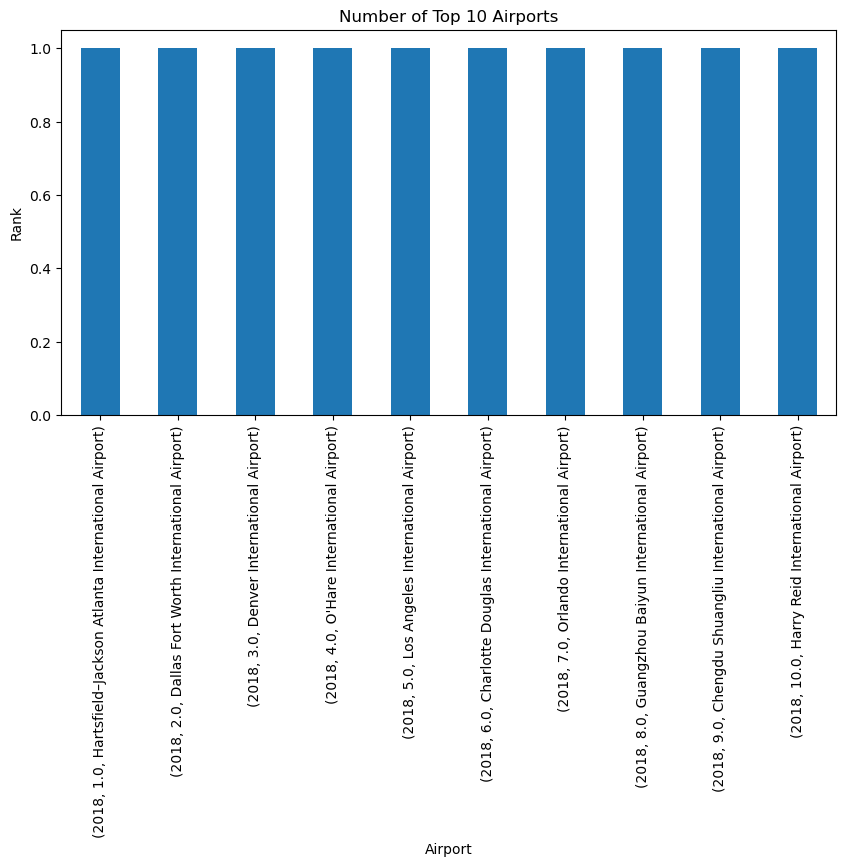

In [21]:
yearGrouped['Airport', 'Rank'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Top 10 Airports")
plt.ylabel('Rank')
plt.xlabel('Airport');

<Axes: xlabel='Rank,Airport'>

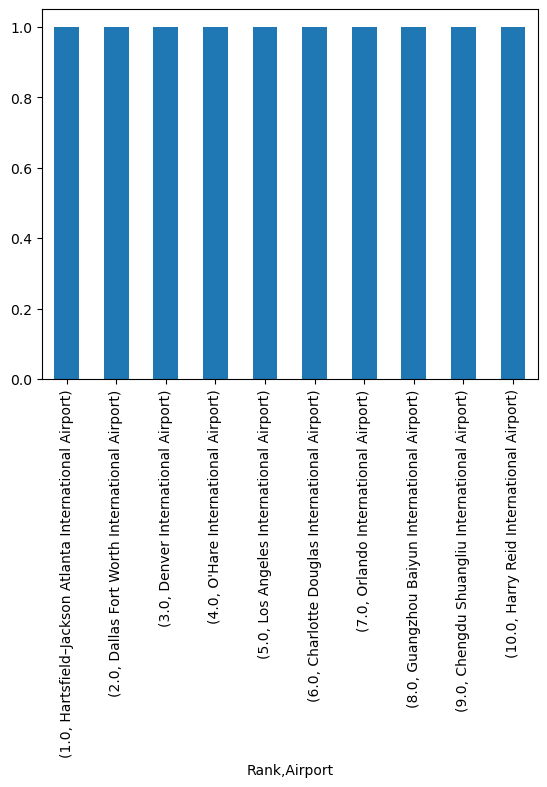

In [27]:
yearGroup = df[df['Year'] == '2018'].groupby(['Rank'])[['Airport', 'Rank']]
yearGroup.value_counts().nlargest(10).plot.bar(stacked=True)